# Example to illustrate how to use WQChartPy

## Introduction

This Jupyter file was created to illustrated how to use WQChartPy by using the example geochemical dataset taken from Yang et al. (2020). This dataset contains a total of 1,184 groundwater samples. Yang et al. (2020) used this dataset to to reveal spatio-temporal patterns and controlling factors of groundwater geochemistry in Jianghan Plain, China.

## Load data

In [42]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load the template data
raw_df = pd.read_csv('../data/data_Yang_et_al_2020.csv')

In [43]:
# Show the number of water samples
print('Totla number of samples: %d' %len(raw_df))

Totla number of samples: 1184


In [44]:
# Show the first five rows
raw_df.head(5)

,Well,X,Y,Sampling year,Sampling season,pH,Ca,Mg,K,Na,Cl,SO4,HCO3,Fe,F,NH4
0,J1,592509.17,3397087.46,1992,dry,6.9,62.7,13.0,0.9,14.9,12.5,10,257.5,0.05,0.16,n.d.
1,J1,592509.17,3397087.46,1992,wet,7.1,68.4,14.5,0.6,13.0,13.8,22.5,277.5,0.08,0.2,n.d.
2,J1,592509.17,3397087.46,1993,dry,6.9,74.2,13.0,0.7,13.1,13.8,10,287.5,0.1,0.28,0.04
3,J1,592509.17,3397087.46,1993,wet,7.9,68.4,14.5,1.3,13.0,12.5,5,280.0,0.08,0.2,n.d.
4,J1,592509.17,3397087.46,1994,dry,7.1,66.8,13.0,0.6,12.7,13.8,7.5,272.5,0.7,0.16,n.d.


One may note that this dataset is the raw data. We will perform the Clustering analysis by following Yang et al. (2020) first and show below how to process the raw data and the use WQChartPy to display the samples.

## Clustering the data using HCA

### Data preprocessing

In [45]:
# Step 1 : Feature selection
pars = ['pH', 'Ca', 'Mg', 'K', 'Na', 'Cl', 'SO4', 'HCO3', 'Fe', 'F', 'NH4']
X_df = raw_df[pars]

# Step 2 : Substitution of censored values
X_df = X_df.replace('n.d.', 0.0075)

# Step 3 : Screening the non-measurement values
X_df = X_df.replace(-9999, np.nan)
X_df = X_df.dropna(axis=0, how='any')

# Step 4: Data transformation
X = np.log(np.float64(X_df.values))

# Step 5 : Standardization 
rescaledX = StandardScaler().fit_transform(X)

In [46]:
# Print the remianing number of samples 
n_samples, n_parameters = rescaledX.shape
print('Number of samples:', n_samples, '\nNumber of variables:', n_parameters)

Number of samples: 1184 
Number of variables: 11


In [47]:
# Get sample ID
Y_df = pd.read_csv('../data/data_Yang_et_al_2020.csv', header=0)[['Well', 'pH', 'Ca', 'Mg', 'K', 'Na', 'Cl', 'SO4', 'HCO3', 'Fe', 'F', 'NH4']].replace('n.d.', 0.0075)

### Clustering the geochemical data by using HCA

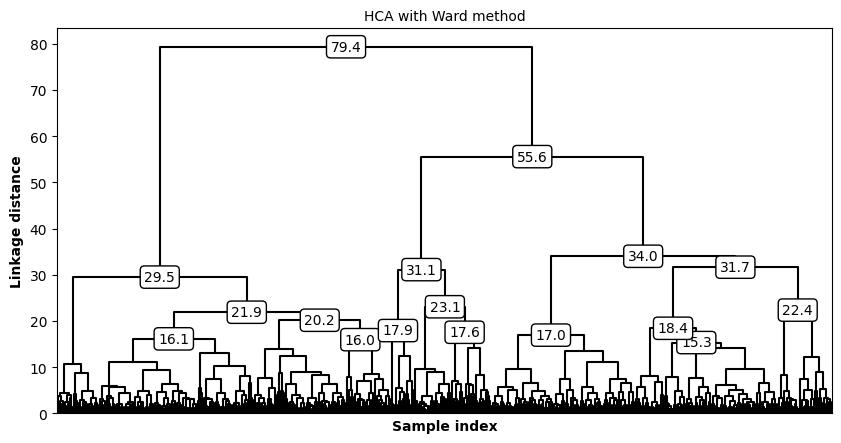

In [48]:
# Use ward method
Z = hierarchy.linkage(rescaledX, method='ward', metric='euclidean')

# Customize the colors of the clusters
colors=['black']
hierarchy.set_link_color_palette(colors)

# plot the dendrogram
plt.figure(figsize=(10, 5))
ddata = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=0, color_threshold=80)

plt.title('HCA with Ward method')
plt.xlabel('Sample index')
plt.ylabel('Linkage distance')
plt.xticks([])

# Label the linkage distance
for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 15:
        # plt.plot(x, y, 'o', c='black')
        plt.text(x, y, '%.1f' %y,
                 fontsize=10,
                 ha="center", va="center",
                 bbox=dict(boxstyle="round", ec='black', fc='white'))
plt.show()

hierarchy.set_link_color_palette(None)

In [49]:
# Group the data into seven clusters
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
y_seven = cluster.fit_predict(rescaledX) 

In [50]:
# Save the clustering results
Y_df['SCI'] = y_seven

# Show Y_df
Y_df

,Well,pH,Ca,Mg,K,Na,Cl,SO4,HCO3,Fe,F,NH4,SCI
0,J1,6.90,62.70,13.00,0.90,14.90,12.50,10,257.50,0.05,0.16,0.0075,2
1,J1,7.10,68.40,14.50,0.60,13.00,13.80,22.5,277.50,0.08,0.2,0.0075,2
2,J1,6.90,74.20,13.00,0.70,13.10,13.80,10,287.50,0.1,0.28,0.04,2
3,J1,7.90,68.40,14.50,1.30,13.00,12.50,5,280.00,0.08,0.2,0.0075,2
4,J1,7.10,66.80,13.00,0.60,12.70,13.80,7.5,272.50,0.7,0.16,0.0075,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,J9,7.73,122.96,35.40,3.77,35.20,62.85,100,437.63,5.84,0.08,0.0075,0
1180,J9,7.50,131.60,40.96,3.53,29.14,64.38,55,535.47,2.36,0.1,0.93,0
1181,J9,7.90,95.57,33.26,3.61,31.98,55.98,55,390.17,6.12,0.1,0.0075,0
1182,J9,7.50,135.59,26.12,5.26,50.94,55.61,172.69,374.54,0.0075,0.12,0.23,0


### Organize the data into WQChartPy required formats

In [62]:
format_df = pd.DataFrame()

format_df['Sample'] = Y_df['Well']
format_df['Label'] = 'C' + (Y_df['SCI'] + 1).map(str)

format_df.loc[y_seven==0, 'Color'] = '#808000'; format_df.loc[y_seven==0, 'Marker'] = 's'
format_df.loc[y_seven==1, 'Color'] = '#008080'; format_df.loc[y_seven==1, 'Marker'] = '^'
format_df.loc[y_seven==2, 'Color'] = '#3cb44b'; format_df.loc[y_seven==2, 'Marker'] = 'o'
format_df.loc[y_seven==3, 'Color'] = '#0082c8'; format_df.loc[y_seven==3, 'Marker'] = 's'
format_df.loc[y_seven==4, 'Color'] = '#FA8072'; format_df.loc[y_seven==4, 'Marker'] = '^'
format_df.loc[y_seven==5, 'Color'] = '#911eb4'; format_df.loc[y_seven==5, 'Marker'] = 'o'
format_df.loc[y_seven==6, 'Color'] = '#e6194b'; format_df.loc[y_seven==6, 'Marker'] = 'D'

format_df['Size'] = 20
format_df['Alpha'] = 0.6

format_df['pH'] = Y_df['pH']
format_df['Ca'] = Y_df['Ca']
format_df['Mg'] = Y_df['Mg']
format_df['Na'] = Y_df['Na']              
format_df['K'] = Y_df['K']   
format_df['HCO3'] = Y_df['HCO3']
format_df['CO3'] = 0
format_df['Cl'] = Y_df['Cl']
format_df['SO4'] = Y_df['SO4'].values


# Reset the index
format_df['SO4'] = pd.to_numeric(format_df['SO4'], errors='coerce')

format_df.reset_index(inplace=True, drop=True)

# Show the df
format_df

,Sample,Label,Color,Marker,Size,Alpha,pH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4
0,J1,C3,#3cb44b,o,20,0.6,6.90,62.70,13.00,14.90,0.90,257.50,0,12.50,10.00
1,J1,C3,#3cb44b,o,20,0.6,7.10,68.40,14.50,13.00,0.60,277.50,0,13.80,22.50
2,J1,C3,#3cb44b,o,20,0.6,6.90,74.20,13.00,13.10,0.70,287.50,0,13.80,10.00
3,J1,C3,#3cb44b,o,20,0.6,7.90,68.40,14.50,13.00,1.30,280.00,0,12.50,5.00
4,J1,C3,#3cb44b,o,20,0.6,7.10,66.80,13.00,12.70,0.60,272.50,0,13.80,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,J9,C1,#808000,s,20,0.6,7.73,122.96,35.40,35.20,3.77,437.63,0,62.85,100.00
1180,J9,C1,#808000,s,20,0.6,7.50,131.60,40.96,29.14,3.53,535.47,0,64.38,55.00
1181,J9,C1,#808000,s,20,0.6,7.90,95.57,33.26,31.98,3.61,390.17,0,55.98,55.00
1182,J9,C1,#808000,s,20,0.6,7.50,135.59,26.12,50.94,5.26,374.54,0,55.61,172.69


## Display the samples by using WQChartPy

Trilinear Piper plot created. Saving it to C:\Users\Jing\Desktop\WQChartPy_revision\code_revision\WQChartPy\examples 



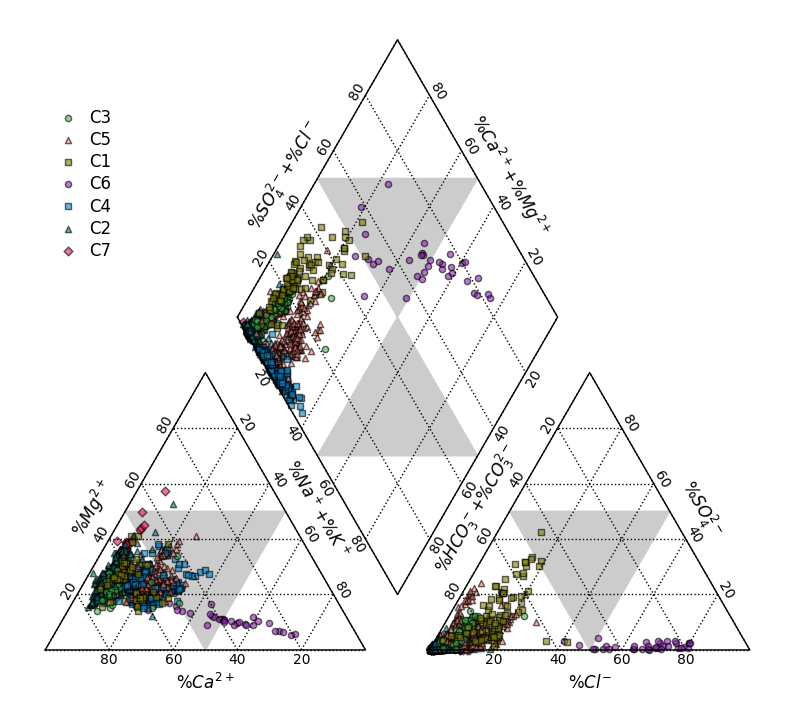

In [63]:
# Import WQChartPy
from wqchartpy import triangle_piper

# Draw the diagram
triangle_piper.plot(format_df, unit='mg/L', figname='triangle Piper diagram', figformat='jpg')